In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# Skipping the 1st row, starting to read data from columns headers:
loan_stats_data = pd.read_csv(r'C:\Users\hila\ml_final_ex\LoanStats3a.csv',low_memory=False,skiprows=1)

In [3]:
# Deleting columns that contain only NaNs:
loan_stats_data=loan_stats_data.dropna(axis=1,how='all',thresh=30000)

# Create a boolean column for loan_status:
d = {'Charged Off':0, 'Fully Paid':1}
loan_stats_data['loan_status_bool'] = pd.Series(loan_stats_data['loan_status'].map(d))

# remove rows with NaN in loan_status_bool column:
loan_stats_data=loan_stats_data.dropna(axis=0, how='any', subset=['loan_status_bool'])

# Removing all columns that have only one unique value:
loan_stats_data=loan_stats_data[[c for c in list(loan_stats_data) if loan_stats_data[c].nunique(dropna=True)>1]]

In [4]:
# Get the names of all non-numeric columns:
loan_stats_data.select_dtypes(exclude='number').columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'debt_settlement_flag'],
      dtype='object')

In [5]:
# Explore the possible values for some of the non-numeric variables:

In [6]:
print('addr_state:') 
print(loan_stats_data.addr_state.unique())
print("We will examine the 'addr_state' as a categorical predictor.")

addr_state:
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
We will examine the 'addr_state' as a categorical predictor.


In [7]:
print('emp_length:')
print(loan_stats_data.emp_length.unique())
print("We will examine 'emp_length' as a ordinal variable")

emp_length:
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
We will examine 'emp_length' as a ordinal variable


In [8]:
print('emp_title:')
print(loan_stats_data.emp_title.unique())
print("Too many categories. We won't use this variable in further analysis.")

emp_title:
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
Too many categories. We won't use this variable in further analysis.


In [9]:
print('grade:')
print(loan_stats_data.grade.unique())
print("We will examine 'grade' as a ordinal variable")

grade:
['B' 'C' 'A' 'E' 'F' 'D' 'G']
We will examine 'grade' as a ordinal variable


In [10]:
print('sub_grade:')
print(loan_stats_data.sub_grade.unique())
print("We will examine the 'grade' variable because it has less categories.")


sub_grade:
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
We will examine the 'grade' variable because it has less categories.


In [11]:
print('home_ownership:')
print(loan_stats_data.home_ownership.unique())
print("We will examine the 'home_ownership' as a categorical predictor.")

home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
We will examine the 'home_ownership' as a categorical predictor.


In [12]:
print('int_rate:')
print(loan_stats_data.int_rate.unique())
# Seems like a a numeric variable so we will change it to float fractions:
loan_stats_data['int_rate']=loan_stats_data['int_rate'].str.rstrip('%').astype('float')/100

int_rate:
[' 10.65%' ' 15.27%' ' 15.96%' ' 13.49%' ' 12.69%' '  7.90%' ' 18.64%'
 ' 21.28%' ' 14.65%' '  9.91%' ' 16.29%' '  6.03%' ' 11.71%' ' 12.42%'
 ' 14.27%' ' 16.77%' '  7.51%' '  8.90%' ' 18.25%' '  6.62%' ' 19.91%'
 ' 17.27%' ' 17.58%' ' 21.67%' ' 19.42%' ' 22.06%' ' 20.89%' ' 20.30%'
 ' 23.91%' ' 19.03%' ' 23.52%' ' 23.13%' ' 22.74%' ' 22.35%' ' 24.11%'
 '  6.00%' ' 22.11%' '  7.49%' ' 11.99%' '  5.99%' ' 10.99%' '  9.99%'
 ' 18.79%' ' 11.49%' '  8.49%' ' 15.99%' ' 16.49%' '  6.99%' ' 12.99%'
 ' 15.23%' ' 14.79%' '  5.42%' ' 10.59%' ' 17.49%' ' 15.62%' ' 21.36%'
 ' 19.29%' ' 13.99%' ' 18.39%' ' 16.89%' ' 17.99%' ' 20.62%' ' 20.99%'
 ' 22.85%' ' 19.69%' ' 20.25%' ' 23.22%' ' 21.74%' ' 22.48%' ' 23.59%'
 ' 12.62%' ' 18.07%' ' 11.63%' '  7.91%' '  7.42%' ' 11.14%' ' 20.20%'
 ' 12.12%' ' 19.39%' ' 16.11%' ' 17.54%' ' 22.64%' ' 13.84%' ' 16.59%'
 ' 17.19%' ' 12.87%' ' 20.69%' '  9.67%' ' 21.82%' ' 19.79%' ' 18.49%'
 ' 22.94%' ' 24.59%' ' 24.40%' ' 21.48%' ' 14.82%' ' 14.17%' '  7.2

In [13]:
print('issue_d:')
print(loan_stats_data.issue_d.unique())
# We will examine the month as a categorical predictor:
loan_stats_data['issue_d'] = loan_stats_data['issue_d'].str[0:3]

issue_d:
['Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-2011' 'Jul-2011'
 'Jun-2011' 'May-2011' 'Apr-2011' 'Mar-2011' 'Feb-2011' 'Jan-2011'
 'Dec-2010' 'Nov-2010' 'Oct-2010' 'Sep-2010' 'Aug-2010' 'Jul-2010'
 'Jun-2010' 'May-2010' 'Apr-2010' 'Mar-2010' 'Feb-2010' 'Jan-2010'
 'Dec-2009' 'Nov-2009' 'Oct-2009' 'Sep-2009' 'Aug-2009' 'Jul-2009'
 'Jun-2009' 'May-2009' 'Apr-2009' 'Mar-2009' 'Feb-2009' 'Jan-2009'
 'Dec-2008' 'Nov-2008' 'Oct-2008' 'Sep-2008' 'Aug-2008' 'Jul-2008'
 'Jun-2008' 'May-2008' 'Apr-2008' 'Mar-2008' 'Feb-2008' 'Jan-2008'
 'Dec-2007' 'Nov-2007' 'Oct-2007' 'Sep-2007' 'Aug-2007' 'Jul-2007'
 'Jun-2007']


In [14]:
print('revol_util:')
print(loan_stats_data.revol_util.unique())
# Seems like a a numeric variable so we will change it to float fractions:
loan_stats_data['revol_util']=loan_stats_data['revol_util'].str.rstrip('%').astype('float')/100


revol_util:
['83.7%' '9.4%' '98.5%' ... '49.63%' '0.04%' '7.28%']


In [15]:
print('zip_code:')
print(loan_stats_data.zip_code.unique())
print("Too many categories. We won't use this variable in further analysis.")

zip_code:
['860xx' '309xx' '606xx' '917xx' '972xx' '852xx' '280xx' '900xx' '958xx'
 '774xx' '853xx' '913xx' '245xx' '951xx' '641xx' '921xx' '067xx' '890xx'
 '770xx' '335xx' '799xx' '605xx' '103xx' '150xx' '326xx' '564xx' '141xx'
 '080xx' '330xx' '974xx' '934xx' '405xx' '946xx' '445xx' '850xx' '604xx'
 '292xx' '088xx' '180xx' '029xx' '700xx' '010xx' '441xx' '104xx' '061xx'
 '616xx' '947xx' '914xx' '765xx' '980xx' '017xx' '752xx' '787xx' '077xx'
 '540xx' '225xx' '440xx' '437xx' '559xx' '912xx' '325xx' '300xx' '923xx'
 '352xx' '013xx' '146xx' '074xx' '786xx' '937xx' '331xx' '115xx' '191xx'
 '114xx' '908xx' '902xx' '992xx' '750xx' '950xx' '329xx' '226xx' '614xx'
 '802xx' '672xx' '083xx' '100xx' '926xx' '931xx' '712xx' '060xx' '707xx'
 '342xx' '895xx' '430xx' '919xx' '996xx' '891xx' '935xx' '801xx' '928xx'
 '233xx' '927xx' '970xx' '211xx' '303xx' '070xx' '194xx' '263xx' '403xx'
 '301xx' '553xx' '993xx' '312xx' '432xx' '602xx' '216xx' '151xx' '971xx'
 '305xx' '334xx' '050xx' '129xx' '925xx' 

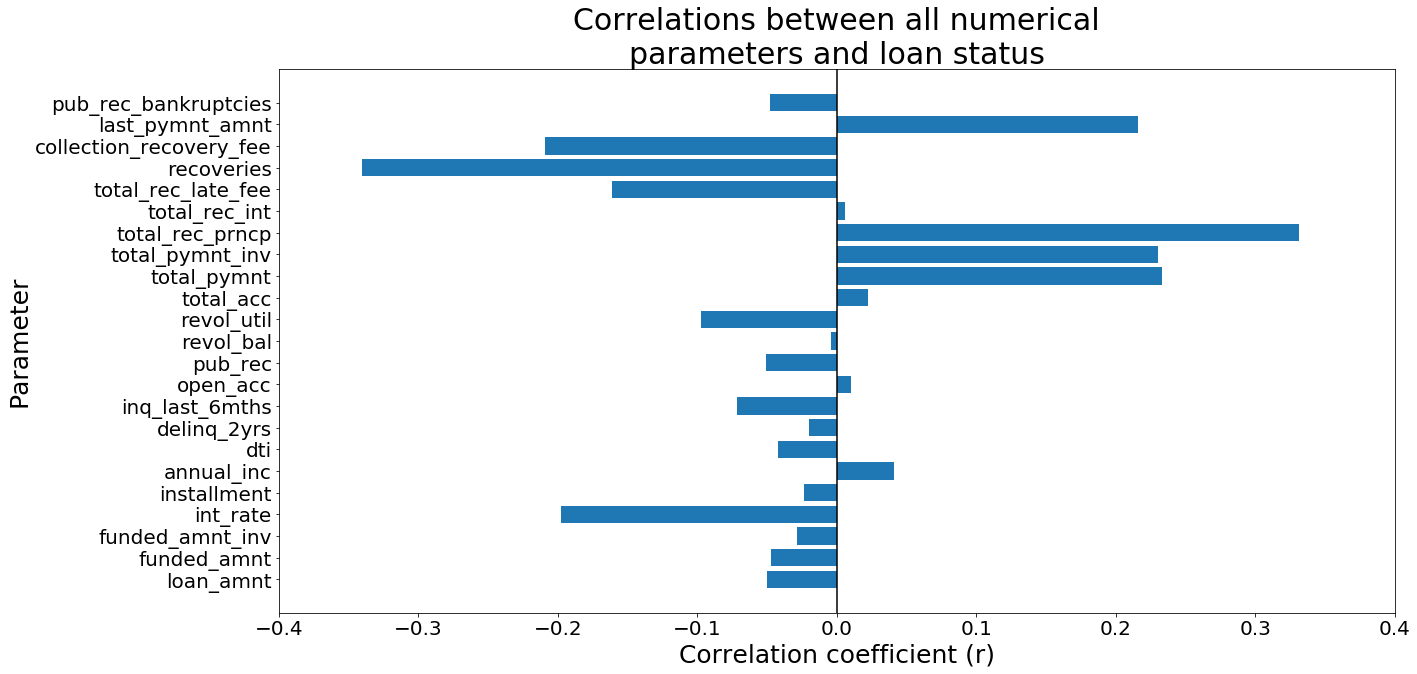

In [16]:
# Find numeric variables:
numeric_data = loan_stats_data._get_numeric_data()

# Find correlations between each column to the loan_status_bool:
r = numeric_data.corr(method="pearson")

plt.figure(figsize=(20,10))
plt.barh(r.columns[:-1],r.loan_status_bool[:-1])
plt.axvline(color='black')
plt.xlim(-0.4, 0.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Parameter',fontsize=25)
plt.xlabel('Correlation coefficient (r)', fontsize=25)
plt.title('Correlations between all numerical\nparameters and loan status',fontsize=30)
plt.show()

In [17]:
# Choose only numeric parametirs with an absolute correlation greater than 0.1:
r = r.loan_status_bool[:-1]
corr_params = r.values
is_corr = np.where(np.abs(corr_params)>0.1)

# Leave only correlated parameters and display descriptive statistics:

numeric_data[r.index[is_corr]].describe()

,int_rate,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000
mean,0.120279,12232.068419,11645.372879,9855.428956,1.388777,98.910397,13.022573,2679.087785
std,0.037275,9167.934939,9071.198517,7143.373160,7.398941,713.320358,152.504078,4443.389974
min,0.054200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.092500,5584.640282,5124.270000,4620.910000,0.000000,0.000000,0.000000,218.025000
50%,0.118600,9937.094781,9311.680000,8000.000000,0.000000,0.000000,0.000000,549.425000
75%,0.145900,16627.629345,15907.607500,14000.000000,0.000000,0.000000,0.000000,3292.122500
max,0.245900,58886.473429,58563.680000,35000.020000,180.200000,29623.350000,7002.190000,36115.200000


C:\Users\hila\Miniconda3\envs\MLcourse\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


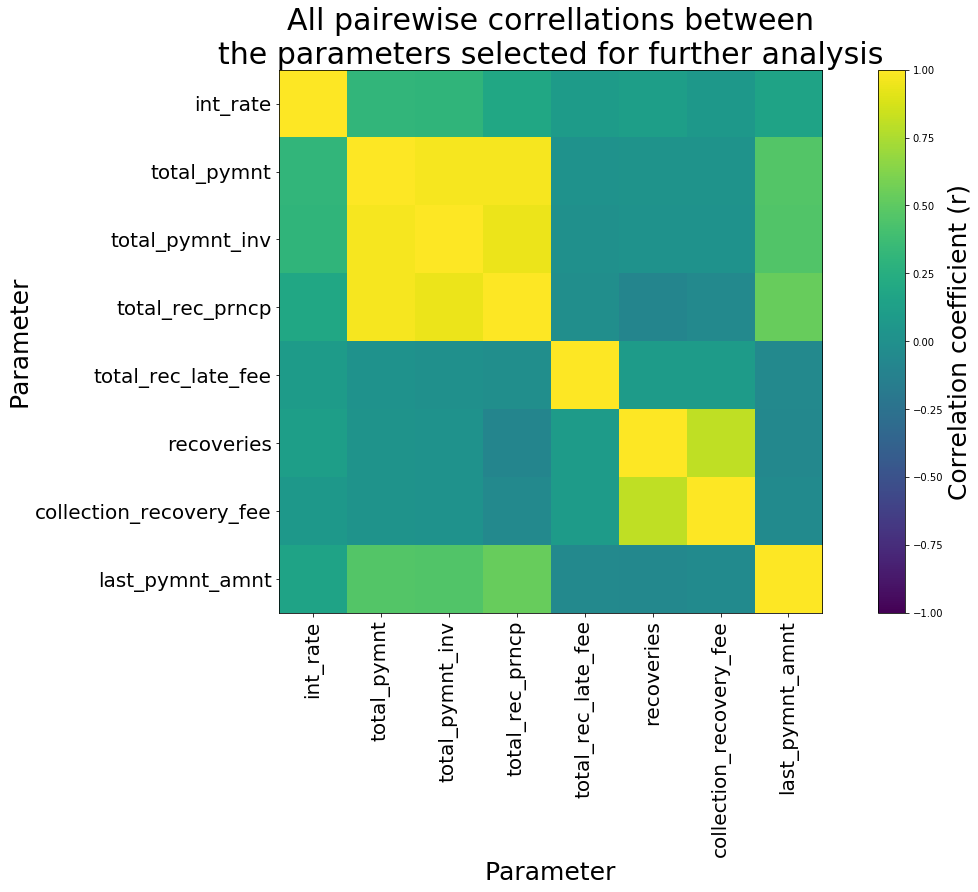

In [18]:
fig = plt.figure(figsize=(20,10))
plt.imshow(numeric_data[r.index[is_corr]].corr().as_matrix())
plt.clim(-1,1)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Correlation coefficient (r)',fontsize=25)
plt.xticks(np.arange(0,len(is_corr[0])),list(r.index[is_corr[0]]), rotation='vertical',fontsize=20)
plt.yticks(np.arange(0,len(is_corr[0])),list(r.index[is_corr[0]]),fontsize=20)
plt.ylabel('Parameter',fontsize=25)
plt.xlabel('Parameter', fontsize=25)
plt.title('All pairewise correllations between\nthe parameters selected for further analysis',fontsize=30)

plt.show()

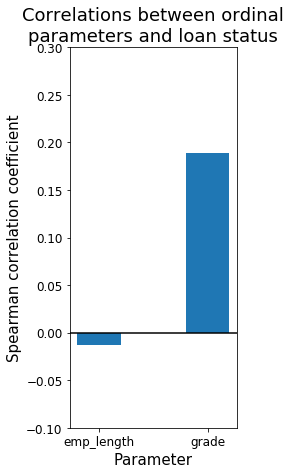

In [19]:
# Examining ordinal variables ('grade' & 'emp_length'):
ordinal_data=pd.DataFrame()
d={'10+ years':10, '< 1 year':0, '1 year': 1, '2 years': 2,'3 years': 3,'4 years': 4,'5 years': 5,
   '6 years': 6,'7 years': 7,'8 years': 8,'9 years': 9}
ordinal_data['emp_length'] = pd.Series(loan_stats_data['emp_length'].map(d))
d = {'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
ordinal_data['grade'] = pd.Series(loan_stats_data['grade'].map(d))
ordinal_data['loan_status_bool'] = loan_stats_data['loan_status_bool']
s = ordinal_data.corr(method="spearman")

plt.figure(figsize=(3,7))
plt.bar(s.columns[:-1],s.loan_status_bool[:-1],0.4)
plt.axhline(color='black')
plt.ylim(-0.1, 0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Parameter',fontsize=15)
plt.ylabel('Spearman correlation coefficient', fontsize=15)
plt.title('Correlations between ordinal\nparameters and loan status',fontsize=18)
plt.show()

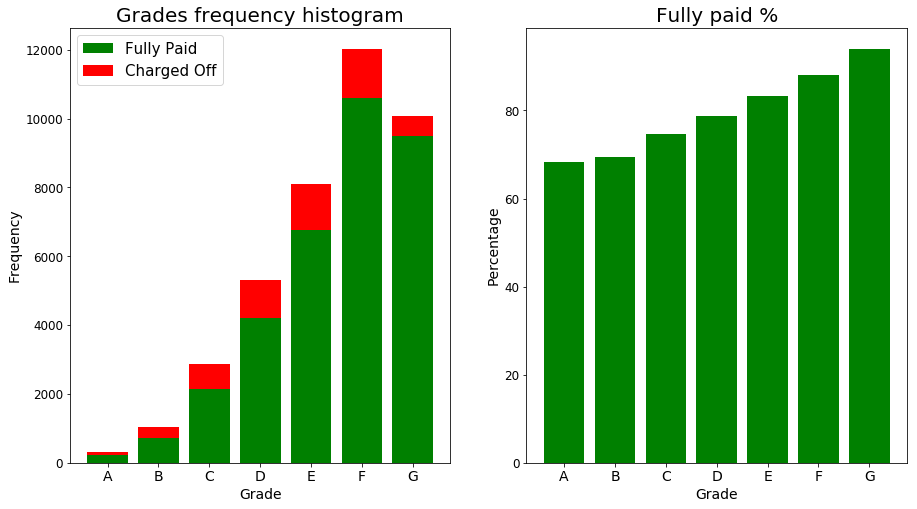

In [20]:
grouped_grades_status=ordinal_data.groupby(["loan_status_bool","grade"]).size()
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(np.arange(7,0,-1), grouped_grades_status[1.0].values[::-1],color='green')
plt.bar(np.arange(7,0,-1), grouped_grades_status[0.0].values[::-1], bottom=grouped_grades_status[1.0].values[::-1], color='red')
plt.xticks(np.arange(1,8),['A','B','C','D','E','F','G'], fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Grades frequency histogram',fontsize=20)
plt.legend(('Fully Paid','Charged Off'),fontsize=15)

plt.subplot(1,2,2)
ppo = 100* grouped_grades_status[1.0].values[::-1]/(grouped_grades_status[1.0].values[::-1]+grouped_grades_status[0.0].values[::-1])
plt.bar(np.arange(7,0,-1), ppo, color='green')
plt.xticks(np.arange(1,8),['A','B','C','D','E','F','G'], fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Fully paid %',fontsize=20)

plt.show()

In [21]:
# Examining categorical variables ('issue_d','home_ownership' & 'addr_state'):

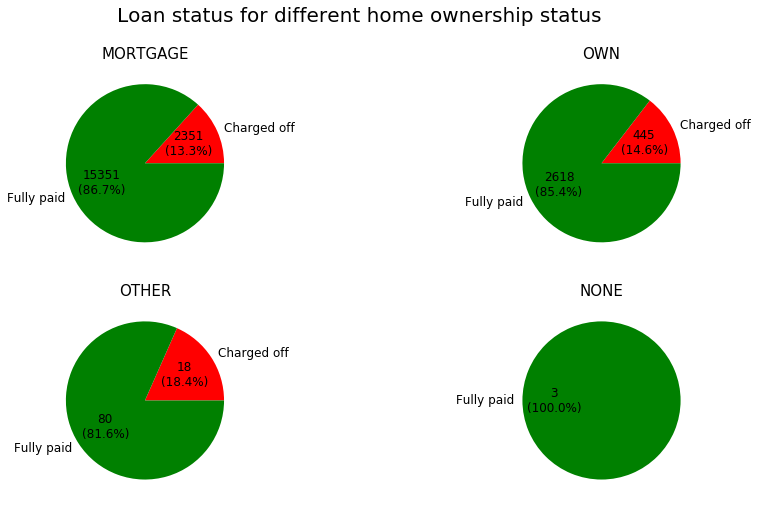

In [22]:
grouped_home_status=loan_stats_data.groupby(["home_ownership","loan_status_bool"]).size()

def pctfunc(pct,allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}\n({:.1f}%)".format(absolute,pct)

plt.figure(figsize=(15,8))
plt.suptitle('Loan status for different home ownership status', fontsize=20)
plt.subplot(2,2,1)
plt.pie(grouped_home_status['MORTGAGE'],labels=['Charged off', 'Fully paid'], colors=['red','green'],
       autopct=lambda pct: pctfunc(pct,grouped_home_status['MORTGAGE']), textprops={'fontsize':12})
plt.title('MORTGAGE', fontsize=15)

plt.subplot(2,2,2)
plt.pie(grouped_home_status['OWN'],labels=['Charged off', 'Fully paid'], colors=['red','green'],
       autopct=lambda pct: pctfunc(pct,grouped_home_status['OWN']), textprops={'fontsize':12})
plt.title('OWN', fontsize=15)

plt.subplot(2,2,3)
plt.pie(grouped_home_status['OTHER'],labels=['Charged off', 'Fully paid'], colors=['red','green'],
       autopct=lambda pct: pctfunc(pct,grouped_home_status['OTHER']), textprops={'fontsize':12})
plt.title('OTHER', fontsize=15)

plt.subplot(2,2,4)
plt.pie(grouped_home_status['NONE'],labels=['Fully paid'], colors=['green'],
       autopct=lambda pct: pctfunc(pct,grouped_home_status['NONE']), textprops={'fontsize':12})
plt.title('NONE', fontsize=15)
plt.show()



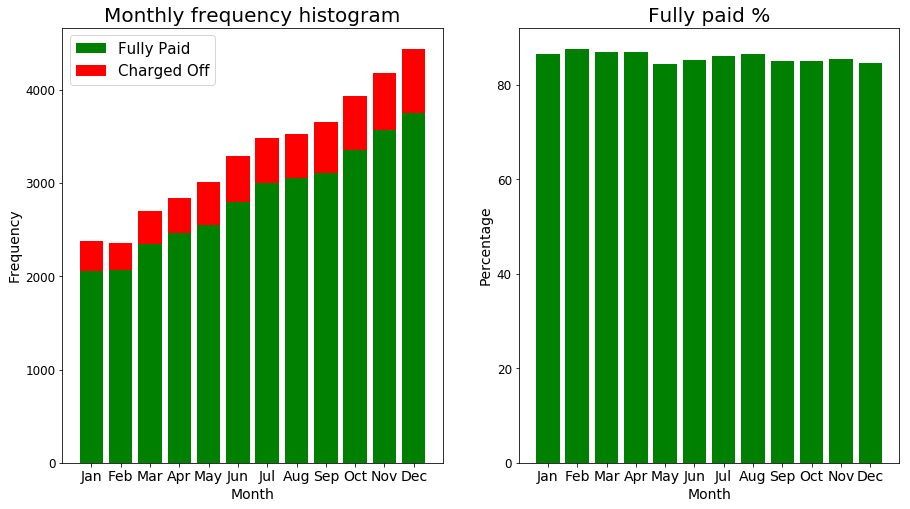

In [24]:
loan_stats_data['month_num']=pd.to_datetime(loan_stats_data.issue_d, format="%b", errors="coerce").dt.month
grouped_issued_status=loan_stats_data.groupby(["loan_status_bool","month_num"]).size()

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(np.arange(1,13), grouped_issued_status[1.0].values,color='green')
plt.bar(np.arange(1,13), grouped_issued_status[0.0].values, bottom=grouped_issued_status[1.0].values, color='red')
plt.xticks(np.arange(12,0,-1),loan_stats_data.issue_d.unique(), fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Monthly frequency histogram',fontsize=20)
plt.legend(('Fully Paid','Charged Off'),fontsize=15)

plt.subplot(1,2,2)
ppo = 100* grouped_issued_status[1.0].values/(grouped_issued_status[1.0].values+grouped_issued_status[0.0].values)
plt.bar(np.arange(1,13), ppo, color='green')
plt.xticks(np.arange(12,0,-1),loan_stats_data.issue_d.unique(), fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Fully paid %',fontsize=20)

plt.show()


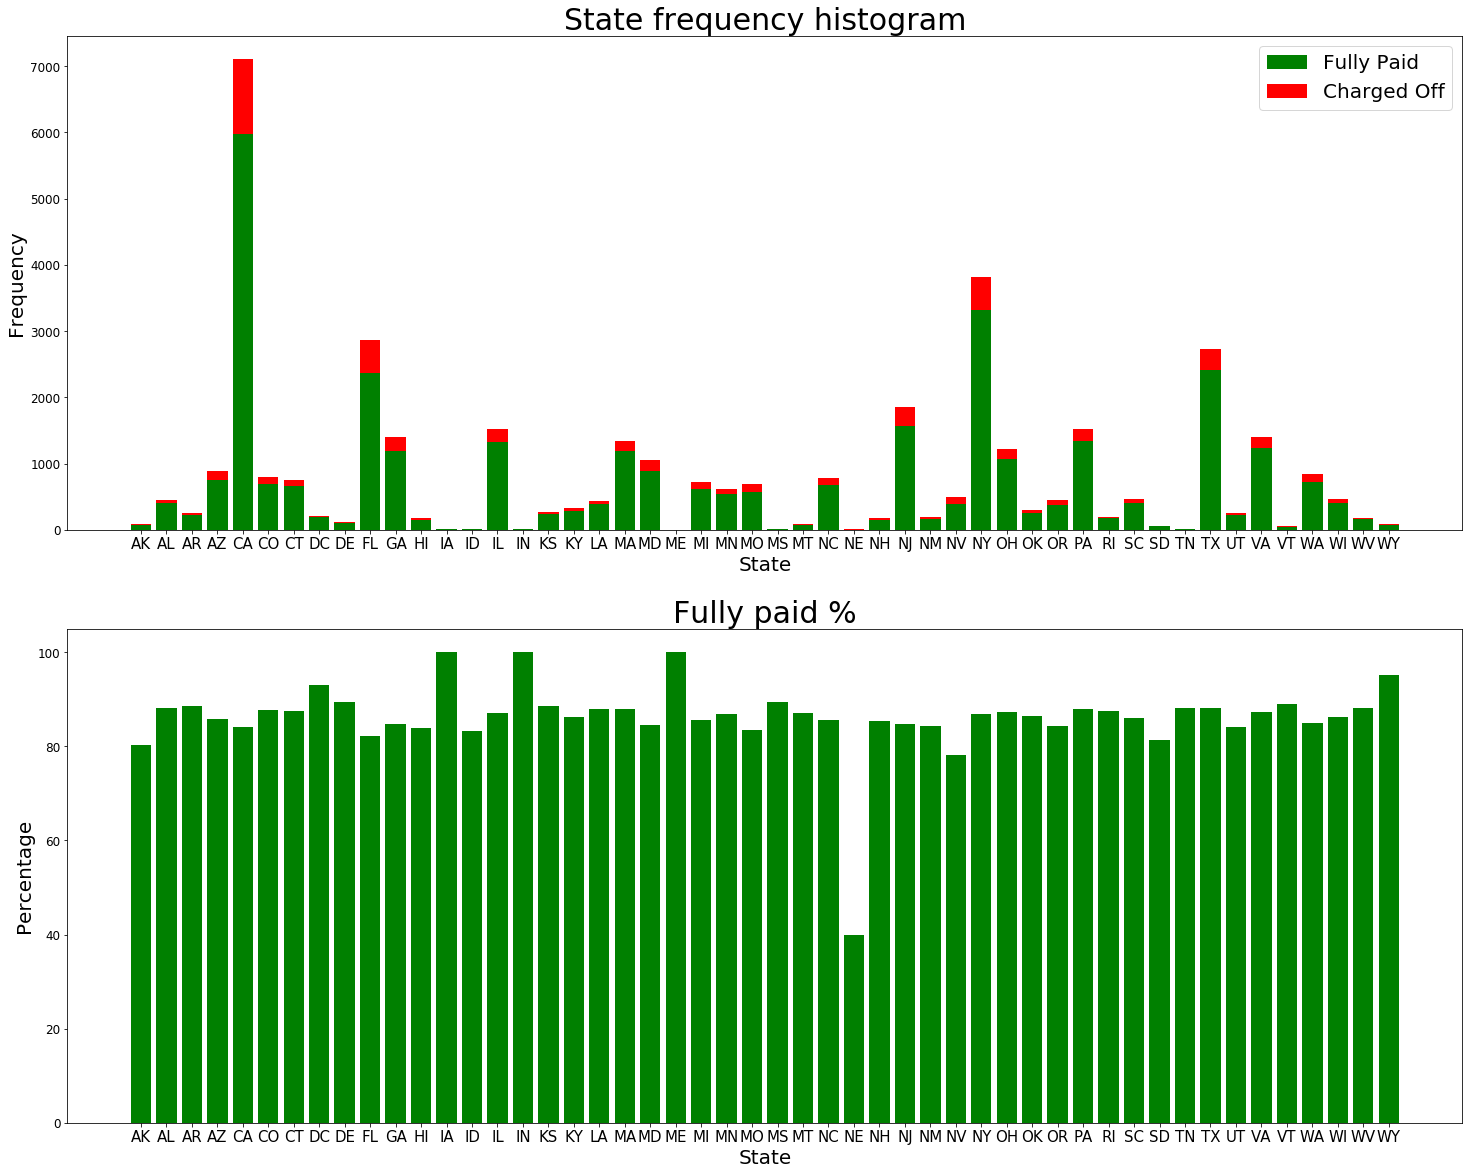

In [40]:
grouped_state_status=loan_stats_data.groupby(["loan_status_bool","addr_state"])
g=grouped_state_status.loan_status_bool.agg(['count'])
idx = pd.MultiIndex.from_product([g.index.levels[0],g.index.levels[1]])
g = g.reindex(idx,fill_value=0)
state_num = len(loan_stats_data.addr_state.unique())
plt.figure(figsize=(25,20))
plt.subplot(2,1,1)
plt.bar(np.arange(1,state_num+1), g.loc[1.0].values.ravel(),color='green')
plt.bar(np.arange(1,state_num+1), g.loc[0.0].values.ravel(), bottom=g.loc[1.0].values.ravel(), color='red')
plt.xticks(np.arange(1,state_num+1),g.index.get_level_values(1), fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('State',fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('State frequency histogram',fontsize=30)
plt.legend(('Fully Paid','Charged Off'),fontsize=20)

plt.subplot(2,1,2)
ppo = 100* g.loc[1.0].values.ravel()/(g.loc[1.0].values.ravel()+g.loc[0.0].values.ravel())
plt.bar(np.arange(1,state_num+1), ppo, color='green')
plt.xticks(np.arange(1,state_num+1),g.index.get_level_values(1), fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('State',fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.title('Fully paid %',fontsize=30)

plt.show()
